In [1]:
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\Welsh-Test-GT15_exclude_True_COLD_instances_per_Container_rawdataaddedAVGadded_skipGT0_1_cvTotalAdded.csv')
df.head()

,container_name,totalContainerRecordSize,EachContainerSize,statistics,pValue,avg_runtime_perContainer,mean_total_population,subtract meanContainer from total,std_runtime_perContainer,cv_each_container,total_population_cv,df,level,container_raw
0,2021/04/08/[$LATEST]979d18318d734f9296e12c0c8a...,13349,44,-0.706259,0.483823,436.772727,428.072065,8.700662,80.711851,0.184791,0.139975,13391,NS - SLOW,"[413, 413, 476, 417, 734, 431, 401, 405, 443, ..."
1,2021/04/08/[$LATEST]a0bf96b19fe94de4a9de76b405...,13349,17,2.108148,0.050893,415.352941,428.072065,-12.719124,24.043933,0.057888,0.139975,13364,FAST,"[393, 403, 427, 403, 403, 421, 415, 414, 499, ..."
2,2021/04/08/[$LATEST]f130e5de893b4f589970d5fb73...,13349,24,-0.218191,0.829198,430.708333,428.072065,2.636268,57.891766,0.134411,0.139975,13371,NS - SLOW,"[423, 411, 491, 442, 386, 382, 461, 626, 385, ..."
3,2021/04/08/[$LATEST]ccf75fc31e02456b8959cbc220...,13349,36,1.249555,0.219663,419.333333,428.072065,-8.738732,41.260016,0.098394,0.139975,13383,NS - FAST,"[453, 399, 414, 404, 425, 403, 397, 403, 432, ..."
4,2021/04/08/[$LATEST]e608cc7d838b405ba44c127eba...,13349,28,0.401021,0.691543,424.214286,428.072065,-3.857780,49.913752,0.117662,0.139975,13375,NS - FAST,"[503, 393, 397, 394, 398, 397, 399, 397, 409, ..."


In [3]:
#df.Rank.dtypes

In [4]:
df = df.drop(['container_raw'], axis = 1)
df.dtypes

container_name                        object
totalContainerRecordSize               int64
EachContainerSize                      int64
statistics                           float64
pValue                               float64
avg_runtime_perContainer             float64
mean_total_population                float64
subtract meanContainer from total    float64
std_runtime_perContainer             float64
cv_each_container                    float64
total_population_cv                  float64
df                                     int64
level                                 object
dtype: object

In [5]:
#preprocessing to convert String to float/int
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df = df.apply(le.fit_transform)
df.head()

,container_name,totalContainerRecordSize,EachContainerSize,statistics,pValue,avg_runtime_perContainer,mean_total_population,subtract meanContainer from total,std_runtime_perContainer,cv_each_container,total_population_cv,df,level
0,159,0,29,59,195,238,0,238,272,270,0,29,2
1,174,0,2,229,72,83,0,83,20,17,0,2,0
2,272,0,9,102,268,196,0,196,214,214,0,9,2
3,223,0,21,195,129,112,0,112,141,147,0,21,1
4,251,0,13,147,241,149,0,149,179,180,0,13,1


In [6]:
from sklearn.preprocessing import OneHotEncoder
# 1. INSTANTIATE
enc = OneHotEncoder(handle_unknown='ignore')

# 2. FIT
enc.fit(df)

# 3. Transform
onehotlabels = enc.transform(df).toarray()
onehotlabels.shape


(301, 2194)

In [7]:
df.head()

,container_name,totalContainerRecordSize,EachContainerSize,statistics,pValue,avg_runtime_perContainer,mean_total_population,subtract meanContainer from total,std_runtime_perContainer,cv_each_container,total_population_cv,df,level
0,159,0,29,59,195,238,0,238,272,270,0,29,2
1,174,0,2,229,72,83,0,83,20,17,0,2,0
2,272,0,9,102,268,196,0,196,214,214,0,9,2
3,223,0,21,195,129,112,0,112,141,147,0,21,1
4,251,0,13,147,241,149,0,149,179,180,0,13,1


In [8]:
features = ['container_name','totalContainerRecordSize','EachContainerSize','avg_runtime_perContainer','std_runtime_perContainer','cv_each_container','df']
X = df[features]
#df = df.drop(['container_raw'], axis = 1)
#target values save as Y
y = df['level']
#df =df.drop(['level'],axis=1)
#df.dtypes

In [9]:
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=500)

In [11]:
# fit the model with data
#logreg.fit(X_train,y_train)

In [12]:
#y_pred=logreg.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
 


0.9342105263157895


In [14]:
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

In [15]:
print(cm)

[[23  0  0  0]
 [ 1 22  0  0]
 [ 0  2 26  0]
 [ 0  0  2  0]]


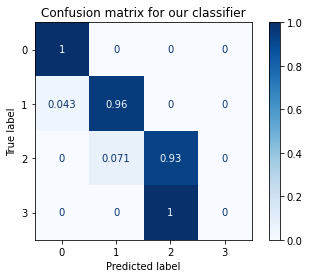

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
matrix = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [18]:
############ now unsupervised

In [ ]:
#table for cpusteal daelta 